## **Example of a waveform/cloud model for a vector ultralight boson**

In [4]:
import numpy as np
from matplotlib import pyplot as plt

* For a given ultralight boson spin (here 1 is chosen, corresponding to a vector) 
and cloud model (described below), 
one first creates an UltralightBoson object. For some models, this requires reading in data files, etc., 
but only needs to be done once. 

In [5]:
from superrad import ultralight_boson as ub
bc = ub.UltralightBoson(spin=1, model="relativistic")

* a waveform model can then be constructed corresponding to specific physical parameters of the system, 
in this case an initial black hole of $M = 20.8 M_\odot$  , dimensionless spin of 0.7 ($\chi=0.7$), and an ultralight boson mass of $1.16 \times 10^{-12}$ eV

In [6]:
wf = bc.make_waveform(20.8, 0.7, 1.16e-12, units="physical")

* this can be used to determine various properties of the black hole-boson cloud system that arises through the superradiant instability. For example:

In [7]:
wf.cloud_growth_time() # Cloud growth time in seconds
wf.mass_cloud(0) #Cloud mass at saturation in solar mass
wf.spin_bh_final() #Final black hole spin 

0.6216222486933041

* It can also be used to calculate the resulting gravitational wave signal as a function of time.

In [8]:
sec_hour = 3600.0
t = np.linspace(0,24*sec_hour, 256) #time
thetaObs = np.pi/3 #Observing angle w.r.t. spin axis
hp,hx,delta = wf.strain_amp(t, thetaObs, dObs=100) # Strain at d=100 Mpc
fgw = wf.freq_gw(t)

* Plotting this

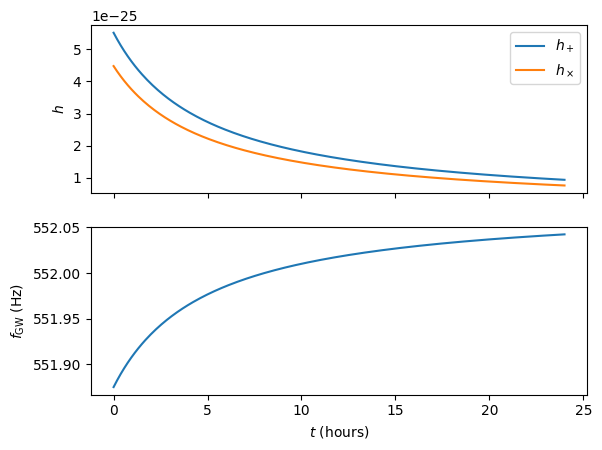

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t/sec_hour, hp, label=r"$h_+$")
ax1.plot(t/sec_hour, hx, label=r"$h_\times$")
ax1.set_ylabel(r"$h$")
ax1.legend(loc="best")
ax2.plot(t/sec_hour, fgw)
ax2.set_ylabel(r"$f_{\rm GW}$ (Hz)")
ax2.set_xlabel(r"$t$ (hours)")
plt.show()

In [15]:
import healpy
from lisagwresponse import ReadStrain
rs=ReadStrain(t,hp,hx,strain_interp_order=5,orbits='/local/home/dd274198/Documents/lisaenv/keplerian-orbits-1-0-2.h5', orbit_interp_order=2, dt=10**5, size=316, t0=0,gw_beta=np.pi / 4, gw_lambda=0)

In [57]:
#SC = [1, 2, 3]
LINKS = [12, 23, 31, 13, 32, 21]
from lisagwresponse import Response
for k,v in rs.ltt.items():
    print(k, v)
#print(type(t))
#print(t)
print(type(LINKS))
print(LINKS)
LINKS = np.array([12, 23, 31, 13, 32, 21])
print(type(LINKS))
print (rs.ltt[12])
print (rs.ltt[12](0))
#response_12 = rs.compute_gw_response(['12'], t)[0]
response_all = rs.compute_gw_response(LINKS,t)



12 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a99e0af0>
23 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a99e0c40>
31 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a99e0df0>
13 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a99e0f40>
32 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a9a286a0>
21 <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline object at 0x7f54a99e3220>
<class 'list'>
[12, 23, 31, 13, 32, 21]
<class 'numpy.ndarray'>
8.33242307063641


KeyError: 0.0